<a href="https://colab.research.google.com/github/vladimiralencar/DeepLearning-LANA/blob/master/CNN/CNN01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (CNNs)

## Carregando imagens

In [2]:
from google.colab import files
files.upload()
!mkdir images
!cp *.png images
!cp *.jpg images
!cp *.gif images


mkdir: cannot create directory ‘images’: File exists


In [3]:
#!rm images
!ls images

arquitetura.png       cnn_grid.png    conv_maxpool2.png  mnist.png
cifar.png	      cnn.jpg	      conv_maxpool.png
cnn_architecture.png  conv-layer.gif  lenet5.png


## CNN

A Rede Neural Convolucional (CNN) é uma tecnologia de rede neural que impactou profundamente a área de Visão Computacional. Fukushima (1980) introduziu o conceito original de uma rede neural convolutiva, e LeCun, Bottou, Bengio & Haffner (1998) melhoraram muito este trabalho. A partir desta pesquisa, Yan LeCun apresentou a famosa arquitetura de rede neural LeNet-5. 

Existem similaridades e diferenças entre as CNNs e outros modelos de DNNs:

* Normalmente usamos a classificação, embora a regressão ainda seja uma opção.
* A entrada para a rede neural agora é 3D (altura, largura, cor)
* Os dados não são transformados; sem zscores ou variáveis dummy.
* O tempo de processamento é muito maior.
* Agora temos diferentes camadas: camadas densas (como antes), camadas de convolução e camadas de Max Pooling.
* Os dados não chegarão mais como arquivos CSV. O TensorFlow fornece alguns utilitários para ir diretamente da imagem para o input de uma rede neural.


Embora a Visão Computacional use principalmente CNNs, essa tecnologia possui aplicações em outras áreas. É possível utilizar CNNs em dados não visuais, mas nesse caso você deve encontrar uma maneira de codificar seus dados para que possa imitar as propriedades dos dados visuais. As CNNs são semelhantes à arquitetura de Mapas Auto Organizáveis (SOM - Self Organizing Maps). A ordem dos elementos vetoriais é crucial para o treinamento. Em contraste, a maioria das redes neurais que não são CNNs ou SOMs tratam seus dados de entrada como um vetor de valores, e a ordem em que você organiza as características de entrada neste vetor é irrelevante. Para esses tipos de redes neurais, você não pode alterar a ordem depois de ter treinado a rede. Em outras palavras, CNNs e SOMs não seguem o tratamento padrão de vetores de entrada.

Normalmente, uma rede neural feedforward comum cria todas as possíveis conexões de peso entre duas camadas. Na terminologia de aprendizagem profunda, nos referimos a essas camadas como camadas densas. Além de não representar todo o peso possível, as redes neurais convolutivas também compartilharão pesos.

# MLPs x CNNs

Existem algumas diferenças importantes entre modelos MLP e CNN:

MLP:

* Somente utiliza camadas totalmente conectadas
* Somente aceita vetores como input

CNN

* Permite fazer tudo que é feito com MLPs
* Utiliza camadas esparsas
* Aceita matrizes como input

# Datasets Para Visão Computacional

Existem muitos conjuntos de dados para visão computacional. Dois dos mais populares são o conjunto de dados MNIST e os conjuntos de dados de imagem CIFAR.

## MNIST Digits Data Set

O [MNIST Digits Data Set](http://yann.lecun.com/exdb/mnist/) é muito popular na comunidade de pesquisa da rede neural. São dígitos escritos à mão que foram escaneados e gravados em um dataset eletrônico.

![MINIST](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/CNN/images/mnist.png?raw=true"MINIST")


## CIFAR Data Set

Os datasets [CIFAR-10 and CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) também são frequentemente usados pela comunidade de pesquisa de rede neural.

![CIFAR](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/CNN/images/cifar.png?raw=true "CIFAR")

O conjunto de dados CIFAR-10 contém imagens divididas em 10 classes. O conjunto de dados CIFAR-100 contém 100 classes em uma hierarquia.

# Arquitetura LeNET-5 (LeCun, 1998)

Podemos usar a arquitetura LeNET-5 principalmente para a classificação de imagens gráficas. Este tipo de rede é semelhante à rede feedforward que examinamos nos capítulos anteriores: fluxo de dados da entrada para a saída. No entanto, a rede LeNET-5 contém vários tipos de camadas diferentes, como mostra a figura abaixo:

**A LeNET-5 Network (LeCun, 1998)**
![LENET5](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/CNN/images/lenet5.png?raw=true  "LENET5")

Existem várias diferenças importantes entre uma rede neural feedforward e uma rede LeNET-5:

* Os vetores passam através de redes feedforward; Os cubos 3D passam através das redes LeNET-5. 
* As redes LeNET-5 contêm uma variedade de tipos de camadas. 
* Visão Computacional é a principal aplicação do LeNET-5.

No entanto, também existem muitas semelhanças entre as DNNs e redes CNNs como a arquitetura LeNET-5. A semelhança mais importante é que podemos treinar o LeNET-5 com as mesmas técnicas baseadas em backpropagation. Qualquer algoritmo de otimização pode treinar os pesos de uma rede feedforward ou LeNET-5. O LeNET-5 frequentemente usa treinamento de backpropagation. Os seguintes tipos de camadas compreendem as redes neurais originais LeNET-5:

* **Dense Layers** - Camadas totalmente conectadas.  
* **Convolution Layers** - Usadas para "escanear" as imagens. 
* **Max Pooling Layers** - Usadas para reduzir as imagens. 
* **Dropout Layer** - Usadas para regularização da rede. 

Outras estruturas de rede neural adicionarão tipos de camada adicionais relacionados à visão computacional. A adição de novos tipos de camada é um meio comum de aumentar a pesquisa existente na rede neural. 

## Feature Learning e Classificação

![CNN](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/CNN/images/cnn.jpg?raw=true "CNN")

## Camadas de Convolução

A primeira camada que examinaremos é a camada convolucional. A camada convolucional é o bloco de construção central de uma rede convolutiva que faz a maior parte do processamento computacional pesado. Vamos primeiro discutir o que a camada convolucional calcula sem analogias cérebro / neurônio. Os parâmetros da camada convolucional consistem em um conjunto de filtros. Cada filtro é pequeno espacialmente (ao longo da largura e altura), mas se estende através da profundidade total do volume de entrada. Por exemplo, um filtro típico em uma primeira camada de uma ConvNet pode ter tamanho 5x5x3 (isto é, 5 pixels de largura e altura e 3, pois as imagens têm a profundidade 3, os canais de cores). Durante a passagem para a frente, deslocamos (mais precisamente, convolvemos) cada filtro na largura e altura do volume de entrada e os produtos de ponto de computação entre as entradas do filtro e a entrada em qualquer posição. Ao deslizar o filtro pela largura e altura do volume de entrada, produziremos um mapa de ativação bidimensional que dê as respostas desse filtro em todas as posições espaciais. Intuitivamente, a rede aprenderá filtros que se ativam quando vêem algum tipo de recurso visual, como uma borda de alguma orientação ou uma mancha de alguma cor na primeira camada, ou, eventualmente, padrões inteiros de favo de mel ou de roda em camadas mais altas da rede. Agora, teremos um conjunto completo de filtros em cada camada convolucional (por exemplo, 12 filtros), e cada um deles produzirá um mapa de ativação bidimensional separado. Vamos empilhar esses mapas de ativação ao longo da dimensão de profundidade e produzir o volume de saída.

Se você é fã das analogias cérebro / neurônio, cada entrada no volume 3D também pode ser interpretada como uma saída de um neurônio que olha apenas uma pequena região na entrada e compartilha parâmetros com todos os neurônios à esquerda e espacialmente à direita (já que esses números resultam da aplicação do mesmo filtro). Agora discutimos os detalhes das conectividades dos neurônios, seu arranjo no espaço e seu esquema de compartilhamento de parâmetros.

Ao lidar com entradas de alta dimensão como as imagens, não é prático conectar neurônios a todos os neurônios no volume anterior. Em vez disso, conectaremos cada neurônio a apenas uma região local do volume de entrada. A extensão espacial desta conectividade é um hiperparâmetro chamado campo receptivo do neurônio (esse é o tamanho do filtro). A extensão da conectividade ao longo do eixo de profundidade é sempre igual à profundidade do volume de entrada. É importante ressaltar novamente essa assimetria na forma como tratamos as dimensões espaciais (largura e altura) e a dimensão da profundidade: as conexões são locais no espaço (ao longo da largura e altura), mas sempre cheias em toda a profundidade do volume de entrada.

Por exemplo, suponha que o volume de entrada tenha tamanho [32x32x3] (por exemplo, uma imagem RGB CIFAR-10). Se o campo receptivo (ou o tamanho do filtro) for 5x5, cada neurônio na camada convolucional terá pesos para uma região [5x5x3] no volume de entrada, para um total de 5 x 5 x 3 = 75 pesos (e +1 Parâmetro de bias). Observe que a extensão da conectividade ao longo do eixo da profundidade deve ser 3, uma vez que esta é a profundidade do volume de entrada.

Começaremos por analisar os hiperparâmetros que você deve especificar para uma camada convolucional na maioria das estruturas de rede neural que suportam a CNN:

* Número de Filtros
* Tamanho do filtro (Filter Size)
* Stride
* Padding
* Função de Ativação

Nós explicamos a conectividade de cada neurônio na camada convolucional ao volume de entrada, mas ainda não discutimos quantos neurônios existem no volume de saída ou como eles estão dispostos. Três hiperparâmetros controlam o tamanho do volume de saída: a profundidade (depth), o passo (stride) e o preenchimento (padding). 

Primeiro, a profundidade do volume de saída é um hiperparâmetro: corresponde ao número de filtros que gostaríamos de usar, cada um aprendendo a procurar algo diferente na entrada. Por exemplo, se a primeira camada convolucional receber como entrada a imagem bruta, então diferentes neurônios ao longo da dimensão de profundidade podem se ativar na presença de várias arestas orientadas ou bolhas de cor. Vamos nos referir a um conjunto de neurônios que estão olhando para a mesma região da entrada como uma coluna de profundidade (algumas pessoas também preferem o termo fibra).
Em segundo lugar, devemos especificar o passo com o qual deslizamos o filtro. Quando o passo é 1, movemos os filtros um pixel de cada vez. Quando o stride é 2 (ou incomumente 3 ou mais, embora isso seja raro na prática), então os filtros saltam 2 pixels de cada vez, enquanto os desliza. Isso produzirá volumes de saída menores espacialmente.
Como veremos em breve, às vezes será conveniente adicionar o volume de entrada com zeros ao redor da borda. O tamanho desse preenchimento é um hiperparâmetro. O bom recurso do preenchimento é que nos permitirá controlar o tamanho espacial dos volumes de saída (mais comumente, como veremos em breve, vamos usá-lo para preservar exatamente o tamanho espacial do volume de entrada, de modo que a largura de entrada e saída e a altura são as mesmas).

![CONV_LAYER](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/CNN/images/conv-layer.gif?raw=true "CONV_LAYER")

Exemplo de arquitetura ConvNet para o CIFAR-10: [INPUT - CONV - RELU - POOL - FC]. Em mais detalhes:

* INPUT [32x32x3] manterá os valores de pixel em estado bruto da imagem, neste caso uma imagem de largura 32, altura 32 e com três canais de cores R, G, B.

* A camada CONV calculará a saída de neurônios que estão conectados a regiões locais na entrada, cada um calculando um dot product entre seus pesos e uma pequena região em que estão conectados no volume de entrada. Isso pode resultar em um volume como [32x32x12] se decidimos usar 12 filtros.

* A camada RELU aplicará uma função de ativação elementar, como max(0, x) com limira igual a zero. Isso deixa o tamanho do volume inalterado ([32x32x12]).

* A camada POOL executará uma operação de downsampling ao longo das dimensões espaciais (largura, altura), resultando em volume como [16x16x12].

* A camada FC (ou seja, totalmente conectada) calculará os escores da classe, resultando em volume de tamanho [1x1x10], onde cada um dos 10 números corresponde a uma pontuação de classe, como entre as 10 categorias do CIFAR-10. Tal como acontece com as Redes Neurais comuns e como o nome indica, cada neurônio nesta camada será conectado a todos os números no volume anterior.

O objetivo principal de uma camada convolucional é detectar características como bordas, linhas, bolhas de cor e outros elementos visuais. Os filtros podem detectar esses recursos. Quanto mais filtros nós damos a uma camada convolucional, mais recursos ela pode detectar.

Um filtro é um objeto em forma de quadrado que escaneia a imagem. Uma grade pode representar os pixels individuais de uma grade. Você pode pensar na camada convolucional como uma grade menor que varre da esquerda para a direita sobre cada linha da imagem. Há também um hiperparâmetro que especifica tanto a largura quanto a altura do filtro em forma de quadrado. 

Uma camada convolucional tem pesos entre ela e a camada anterior ou grade de imagem. Cada pixel em cada camada convolucional é um peso. Portanto, o número de pesos entre uma camada convolucional e sua camada anterior ou campo de imagem é o seguinte:

```
[FilterSize] * [FilterSize] * [# de Filtros]
```

Por exemplo, se o tamanho do filtro fosse 5 (5x4) para 10 filtros, haveria 250 pesos.

Você precisa entender como os filtros convolucionais varrem a saída da camada anterior ou a grade da imagem. A figura abaixo ilustra a varredura:

![GRID](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/CNN/images/cnn_grid.png?raw=true  "GRID")

A figura acima mostra um filtro convolucional com um tamanho de 4 e um tamanho de preenchimento de 1. O tamanho do preenchimento é responsável pelo limite de zeros na área que o filtro varre. Mesmo que a imagem seja realmente 8x7, o preenchimento extra fornece um tamanho de imagem virtual de 9x8 para que o filtro varre. O passo especifica o número de posições nas quais os filtros convolucionais vão parar. Os filtros convolucionais se movem para a direita, avançando pelo número de células especificadas no passo. Uma vez que a extrema direita é alcançada, o filtro convolucional volta para o extremo esquerdo, então ele se move para baixo pelo montante do passo e continua a direita novamente.

Existem algumas restrições em relação ao tamanho do passo. Obviamente, o passo não pode ser 0. O filtro convolucional nunca se moveria se o passo fosse ajustado para 0. Além disso, nem o passo, nem o tamanho do filtro convolucional podem ser maiores do que a grade anterior. Existem restrições adicionais sobre o (s) passo (s), preenchimento (p) e a largura do filtro (f) para uma imagem de largura (w). Especificamente, o filtro convolucional deve ser capaz de começar no limite superior esquerdo ou superior, mover um certo número de passos e aterrar na fronteira extrema ou inferior. A seguinte equação mostra o número de etapas de um operador convolucional deve atravessar a imagem:

$ steps = \frac{w - f + 2p}{s+1} $

O número de etapas deve ser um número inteiro. Em outras palavras, não pode ter casas decimais. O propósito do preenchimento (p) deve ser ajustado para tornar esta equação tornar-se um valor inteiro.

## Compartilhamento de Parâmetros

A arquitetura que ganhou o desafio ImageNet em 2012 recebeu imagens de tamanho [227x227x3]. Na primeira Camada Convolucional, utilizou neurônios com tamanho de campo receptivo F = 11, passo (stride) S = 4 e sem preenchimento (zero padding) P = 0. Desde (227 - 11) / 4 + 1 = 55, e uma vez que a camada Conv teve uma profundidade de K = 96, o volume de saída da camada Conv teve tamanho [55x55x96]. Cada um dos 55 * 55 * 96 neurônios neste volume foi conectado a uma região de tamanho [11x11x3] no volume de entrada. Além disso, todos os 96 neurônios em cada coluna de profundidade estão conectados à mesma região [11x11x3] da entrada, mas é claro com pesos diferentes. Se você ler o documento atual da pesquisa (na seção de links úteis) verá que as imagens de entrada eram 224x224, o que certamente é incorreto porque (224 - 11) / 4 + 1 é claramente não um número inteiro. Isso confundiu muitas pessoas na história dos ConvNets e pouco se sabe sobre o que aconteceu. O melhor palpite é que Alex usou zero-padding de 3 pixels extras que ele não menciona no papel.

O esquema de compartilhamento de parâmetros é usado em Camadas Convolucionais para controlar o número de parâmetros. Usando o exemplo acima, vemos que existem 55 * 55 * 96 = 290.400 neurônios na primeira camada Conv, e cada um tem 11 x 11 x 3 = 363 pesos e 1 bias. Juntos, isso acrescenta a 290400 * 364 = 105.705.600 parâmetros na primeira camada do ConvNet sozinho. Claramente, esse número é muito alto.

Acontece que podemos reduzir drasticamente o número de parâmetros fazendo uma suposição razoável: se um recurso é útil para calcular em alguma posição espacial (x, y), então também deve ser útil para calcular em uma posição diferente (x2 , Y2). Em outras palavras, indicando uma única fatia de profundidade bidimensional como uma fatia de profundidade (por exemplo, um volume de tamanho [55x55x96] tem 96 fatias de profundidade, cada um de tamanho [55x55]), vamos restringir os neurônios em cada fatia de profundidade para usar os mesmos pesos e bias. Com este esquema de compartilhamento de parâmetros, a primeira camada Conv em nosso exemplo agora teria apenas 96 conjuntos de pesos exclusivos (um para cada trecho de profundidade), para um total de 96 * 11 * 11 * 3 = 34.848 pesos exclusivos ou 34.944 parâmetros (+96 bias). Alternativamente, todos os 55 x 55 neurônios em cada fatia de profundidade agora estarão usando os mesmos parâmetros. Na prática, durante a pós-propagação, cada neurônio no volume calculará o gradiente para os pesos, mas esses gradientes serão adicionados em cada fatia de profundidade e atualizarão apenas um único conjunto de pesos por fatia.

## Camadas de Max Pooling 

As camadas Max Pooling reduzem a caixa 3D para uma nova com dimensões menores. Normalmente, você sempre pode colocar uma camada de Max Pooling imediatamente após a camada convolucional. O LENET mostra a camada de Max Pooling imediatamente após as camadas C1 e C3. Essas camadas de Max Pooling diminuem progressivamente o tamanho das dimensões das caixas 3D passando por elas. Esta técnica pode evitar o overfitting (Krizhevsky, Sutskever & Hinton, 2012).

É comum inserir periodicamente uma camada de Max Pooling (também chamada de agrupamento) entre as camadas Convolucionais sucessivas em uma arquitetura ConvNet. Sua função é reduzir progressivamente o tamanho espacial da representação para reduzir a quantidade de parâmetros e computação na rede e, portanto, também controlar o overfitting. A Camada de agrupamento opera independentemente em cada fatia de profundidade da entrada e redimensiona-a espacialmente, usando a operação MAX. A forma mais comum é uma camada de agrupamento com filtros de tamanho 2x2 aplicados com um passo de 2 amostras descendentes de cada fatia de profundidade na entrada por 2 ao longo de largura e altura, descartando 75% das ativações. Toda operação MAX, neste caso, receberia um máximo de 4 números (pequena região 2x2 em uma fatia de profundidade). A dimensão da profundidade permanece inalterada. Mais geralmente, a camada de pooling:

![MaxPool](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/CNN/images/conv_maxpool2.png?raw=true  "MaxPool")

Uma camada de Max Pooling possui os seguintes hiperparâmetros:

* Spatial Extent (f)
* Stride (s)

Ao contrário das camadas convolucionais, as camadas Max Pooling não usam preenchimento. Além disso, as camadas de Max Pooling não possuem pesos, então o treinamento não as afeta. Essas camadas simplesmente diminuem sua entrada na caixa 3D. A saída da caixa 3D por uma camada de Max Pooling terá uma largura igual a esta equação:

$ w_2 = \frac{w_1 - f}{s + 1} $

A altura da caixa 3D produzida pela camada de Max Pooling é calculada de forma semelhante com esta equação:

$ h_2 = \frac{h_1 - f}{s + 1} $

A profundidade da caixa 3D produzida pela camada max-pool é igual à profundidade que a caixa 3D recebeu como entrada. A configuração mais comum para hiper-parâmetros de uma camada de pool máximo são f = 2 e s = 2. A extensão espacial (f) especifica que as caixas de 2x2 serão dimensionadas para pixels individuais. Destes quatro pixels, o pixel com o valor máximo representará o pixel 2x2 na nova grade. Como os quadrados do tamanho 4 são substituídos pelo tamanho 1, 75% das informações do pixel são perdidas. A figura a seguir mostra esta transformação como uma grade 6x6 torna-se um 3x3:

![MaxPool](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/CNN/images/conv_maxpool.png?raw=true  "MaxPool")

Claro, o diagrama acima mostra cada pixel como um único número. Uma imagem em escala de cinza teria essa característica. Para uma imagem RGB, geralmente tomamos a média dos três números para determinar qual pixel tem o valor máximo.

## Camadas Densas

O tipo de camada final em uma rede LeNET-5 é uma camada densa. Esse tipo de camada é exatamente o mesmo tipo de camada que já vimos em redes neurais feedforward. Uma camada densa conecta cada elemento (neurônio) na caixa 3D de saída da camada anterior para cada neurônio na camada densa. O vetor resultante é passado através de uma função de ativação. As redes LeNET-5 normalmente usarão uma ativação ReLU. No entanto, podemos usar uma função de ativação sigmoid. Essa técnica é menos comum. Uma camada densa geralmente contém os seguintes hiperparâmetros:

* Neuron Count 
* Activation Function

A contagem de neurônios especifica o número de neurônios que compõem essa camada. A função de ativação indica o tipo de função de ativação a ser utilizada. As camadas densas podem empregar muitos tipos diferentes de funções de ativação, como ReLU, sigmoide ou tangente hiperbólica. As redes LeNET-5 normalmente contêm várias camadas densas como suas camadas finais. A camada final densa em uma LeNET-5 realmente executa a classificação. Deve haver um neurônio de saída para cada classe, ou tipo de imagem, para classificar. Por exemplo, se a rede distingue entre cães, gatos e aves, haverá três neurônios de saída. Você pode aplicar uma função final de softmax para a camada final para tratar os neurônios de saída como probabilidades. O Softmax permite que cada neurônio forneça a probabilidade de a imagem representar cada classe. Como os neurônios de saída são agora probabilidades, o softmax garante que eles somam 1,0 (100%). 

Esse diagrama resume bem a arquitetura de uma CNN:

![CNN](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/CNN/images/cnn.jpg?raw=true  "CNN")

# Construindo uma CNN com TensorFlow e Keras

O Keras fornece classes de acesso incorporadas para o MNIST. É importante notar que os dados MNIST chegam já separados em dois conjuntos:

* **treino** 
* **teste** 

In [4]:
# Checando a memória da GPU
!nvidia-smi

Sat Jan 19 11:39:39 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    70W / 149W |    170MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
# Imports
from keras.datasets import mnist

# Treino e Teste
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print do Shape
print("Shape x_train: {}".format(x_train.shape))
print("Shape y_train: {}".format(y_train.shape))
print()
print("Shape x_test: {}".format(x_test.shape))
print("Shape y_test: {}".format(y_test.shape))

Shape x_train: (60000, 28, 28)
Shape y_train: (60000,)

Shape x_test: (10000, 28, 28)
Shape y_test: (10000,)


# Visualizando os Dígitos

In [6]:
# Display como texto
from IPython.display import display
import pandas as pd

print("Shape do dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Display de um único dígito
single = x_train[0]
print("\nShape de um Único Dígito: {}".format(single.shape))
print("\nDígito: {}".format(y_train[0]))

#display(pd.DataFrame(single.reshape(28,28)))
df = pd.DataFrame(single.reshape(28,28))
df.loc[:,4:23] # onde pixel > 0

Shape do dataset: (60000, 28, 28)
Labels: [5 0 4 ... 5 6 8]

Shape de um Único Dígito: (28, 28)

Dígito: 5


,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127
6,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64
7,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0
8,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0
9,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0


Imagem (#0) é o dígito '5'


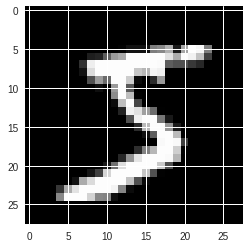

In [7]:
# Display como imagem
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 101 
digit = 0
a = x_train[digit]
plt.imshow(a, cmap = 'gray', interpolation = 'nearest')
print("Imagem (#{}) é o dígito '{}'".format(digit, y_train[digit]))

# Preparando os Dados

In [8]:
import keras
from keras import backend as backend

# Input das dimensões das imagens
img_rows, img_cols = 28, 28

# Reshape dos dados de treino e de teste e input_shape
if backend.image_data_format() == 'channels_first': # canal de cores
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Conversão para float32 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Escala
x_train /= 255
x_test /= 255

# Print
print('x_train shape:', x_train.shape)
print("Exemplos de Treino: {}".format(x_train.shape[0]))
print("Exemplos de Teste: {}".format(x_test.shape[0]))
print("Input Shape: {}".format(input_shape))

x_train shape: (60000, 28, 28, 1)
Exemplos de Treino: 60000
Exemplos de Teste: 10000
Input Shape: (28, 28, 1)


In [9]:
# Display de um único dígito NORMALIZADO
single = x_train[0]
print("\nShape de um Único Dígito: {}".format(single.shape))
print("\nDígito: {}".format(y_train[0]))

#display(pd.DataFrame(single.reshape(28,28)))

pd.options.display.float_format  = '{:,.2f}'.format
df = pd.DataFrame(single.reshape(28,28)) 

df2 = df.copy()
for lin in range(28):
    for col in range(28):
        if df2.loc[lin,col] == 0.0:
            df2.loc[lin,col] = 0     

df2.loc[5:24,4:23] # onde pixel > 0


Shape de um Único Dígito: (28, 28, 1)

Dígito: 5


,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.07,0.07,0.07,0.49,0.53,0.69,0.10,0.65,1.00,0.97,0.50
6,0.00,0.00,0.00,0.00,0.12,0.14,0.37,0.60,0.67,0.99,0.99,0.99,0.99,0.99,0.88,0.67,0.99,0.95,0.76,0.25
7,0.00,0.00,0.00,0.19,0.93,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.98,0.36,0.32,0.32,0.22,0.15,0.00
8,0.00,0.00,0.00,0.07,0.86,0.99,0.99,0.99,0.99,0.99,0.78,0.71,0.97,0.95,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.31,0.61,0.42,0.99,0.99,0.80,0.04,0.00,0.17,0.60,0.00,0.00,0.00,0.00,0.00,0.00
10,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.60,0.99,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.55,0.99,0.75,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.75,0.99,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.95,0.88,0.63,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.94,0.99,0.99,0.47,0.10,0.00,0.00,0.00,0.00,0.00


In [10]:
# Display de um único dígito DIFERENTE DE ZERO ACESSO = 1
single = x_train[0]
print("\nShape de um Único Dígito: {}".format(single.shape))
print("\nDígito: {}".format(y_train[0]))

#display(pd.DataFrame(single.reshape(28,28)))

pd.options.display.float_format  = '{:,.0f}'.format
df = pd.DataFrame(single.reshape(28,28)) 

count1 = 0
df2 = df.copy()
for lin in range(28):
    for col in range(28):
        if df2.loc[lin,col] != 0.0:
            count1 += 1
            df2.loc[lin,col] = 1     

print('numero de 1s:',count1)
print('numero de 0s:', (28*28) - count1)  
df2.loc[5:24,4:23] # onde pixel > 0


Shape de um Único Dígito: (28, 28, 1)

Dígito: 5
numero de 1s: 166
numero de 0s: 618


,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
5,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
8,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
9,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0
10,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0


## Definindo a CNN

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Definindo os hiperparâmetros
batch_size = 128
num_classes = 10
epochs = 12

# Converte vetores de classe para matrizes de classe binária
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Modelo CNN
# https://keras.io/layers/convolutional/#conv2d
model = Sequential()                      # 2x2  padding = abrangue todo filtro a entrada  # Input Shape: (28, 28, 1)
input_shape = (28, 28, 1)
model.add(Conv2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2)) # 2x2 - reduz a dimensionalidade e reduz o overfitting
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Compilação do modelo
model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer = keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

Nota: observe que aumentamos a quantidade de filtros. Isso se deve ao fato que queremos aumentar a profundidade do nosso array, ao mesmo tempo que reduzimos altura e largura com a camada Max Pooling. O processo de convolução tem exatamente o objetivo de tornar o array mais profundo, enquanto a camada Max Pooling reduz o espaço dimensional. Basicamente fazemos isso: convertemos um quadrado representando uma imagem em vários pequenos quadrados representando cada um características das imagens. No final, entregamos esse array a uma camada totalmente conectada e fazemos a classificação.
![CNN](images/cnn_architecture.png "CNN")

## Treinamento da CNN

In [13]:
import tensorflow as tf
tf.__version__

'1.12.0'

In [14]:
import keras as kr
kr.__version__

'2.2.4'

In [15]:
import tensorflow as tf

from datetime import datetime
t1 = datetime.now()

# Fit do modelo
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 2, validation_data = (x_test, y_test))
print("tempo decorrido:", datetime.now() - t1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 - 8s - loss: 0.2922 - acc: 0.9074 - val_loss: 0.0554 - val_acc: 0.9825
Epoch 2/12
 - 4s - loss: 0.0603 - acc: 0.9809 - val_loss: 0.0448 - val_acc: 0.9869
Epoch 3/12
 - 4s - loss: 0.0412 - acc: 0.9870 - val_loss: 0.0312 - val_acc: 0.9897
Epoch 4/12
 - 4s - loss: 0.0324 - acc: 0.9896 - val_loss: 0.0537 - val_acc: 0.9827
Epoch 5/12
 - 4s - loss: 0.0255 - acc: 0.9918 - val_loss: 0.0306 - val_acc: 0.9906
Epoch 6/12
 - 4s - loss: 0.0217 - acc: 0.9928 - val_loss: 0.0381 - val_acc: 0.9884
Epoch 7/12
 - 4s - loss: 0.0169 - acc: 0.9948 - val_loss: 0.0369 - val_acc: 0.9885
Epoch 8/12
 - 4s - loss: 0.0140 - acc: 0.9955 - val_loss: 0.0419 - val_acc: 0.9874
Epoch 9/12
 - 4s - loss: 0.0115 - acc: 0.9964 - val_loss: 0.0328 - val_acc: 0.9893
Epoch 10/12
 - 4s - loss: 0.0105 - acc: 0.9967 - val_loss: 0.0315 - val_acc: 0.9918
Epoch 11/12
 - 4s - loss: 0.0082 - acc: 0.9974 - val_loss: 0.0312 - val_acc: 0.9918
Epoch 12/12
 - 4s - loss: 0.0065 - 

In [16]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [0]:
((60000, 28, 28, 1), (60000, 10))

In [17]:
x_test.shape, y_test.shape

((10000, 28, 28, 1), (10000, 10))

In [19]:
model.summary()

# Fórmula: número de parâmetros em uma camada convolucional
# O número de parâmetros em uma camada convolucional depende dos valores fornecidos dos filtros, 
#                                                                                      kernel_size e input_shape. 
# Vamos definir algumas variáveis:

# K - o número de filtros na camada convolucional
# F - altura e largura dos filtros convolucionais
# D_in - a profundidade da camada anterior

# Observe que K = filtros e F = kernel_size. Da mesma forma, D_in é o último valor na tupla input_shape.

# Uma vez que existem pesos F * F * D por filtro e a camada convolucional é composta por filtros K, 
# o número total de pesos na camada convolucional é:

# K * F * F * D_in. 

# Uma vez que existe um termo de bias por filtro, a camada convolucional tem bias igual ao valor de K. 
# Assim, o número de parâmetros na camada convolucional é dado por K * F * F * D_in + K.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [20]:
for layer in model.layers:
    print(layer.name, layer.output_shape ) # layer.inbound_nodes layser.outbound_nodes

conv2d_1 (None, 28, 28, 16)
max_pooling2d_1 (None, 14, 14, 16)
conv2d_2 (None, 14, 14, 32)
max_pooling2d_2 (None, 7, 7, 32)
conv2d_3 (None, 7, 7, 64)
max_pooling2d_3 (None, 3, 3, 64)
flatten_1 (None, 576)
dense_1 (None, 500)
dense_2 (None, 10)


## Avaliando a Acurácia

Note, se você estiver usando uma GPU, você pode obter a mensagem de erro ** ResourceExhaustedError **. Isso ocorre porque a GPU pode não ter RAM suficiente para prever todo o conjunto de dados ao mesmo tempo.

In [21]:
# Avaliação nos dados de teste
# Neste caso, estamos avaliando o modelo no dataset de teste inteiro. 
# Isso pode não caber na memória da GPU
score = model.evaluate(x_test, y_test, verbose=0)

# Print
print('Perda em Teste: {}'.format(score[0]))
print('Acurácia em Teste: {}'.format(score[1]))

Perda em Teste: 0.03181745680046615
Acurácia em Teste: 0.9923


As GPUs são mais utilizadas durante o treinamento do que nas previsões.

Para as previsões, desative a GPU ou apenas preveja em uma amostra menor. 

Se a sua GPU tiver memória suficiente, o código de previsão acima pode funcionar bem. Caso contrário, basta uma previsão em uma amostra com o seguinte código:

In [22]:
from sklearn import metrics

# Para avaliação do modelo usando GPU, usamos amostras dos dados de teste
small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y, axis = 1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Acurácia: {}'.format(score))

Acurácia: 1.0


In [24]:
print(small_y[:8])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
